A Padé approximant is a rational function, i.e., a function expressed as a fraction whose numerator and denominator are both polynomials, whose power series expansion agrees with a given power series to the highest possible order.

The primary application of Padé approximants is to problems where it is possible to derive the solution formally as a power series expansion in some parameter. The corresponding Padé approximants often turn out to be much more useful than the power series itself.

Given the power series
\begin{equation}
    f(x) = \sum_{k=0}^\infty c_kx^k,
    \end{equation}
the $[L, M]$ Padé approximant $R_{L,M}(x)$ is defined by
\begin{equation}
    R_{L,M}(x) = \frac{\sum_{k=0}^L p_kx^k}{1 + \sum_{k=1}^M q_kx^k}
\end{equation}
such that
\begin{equation}
    f(x) - R_{L,M}(x) = O(x^{L+M+1}),
\end{equation}
i.e., the first $L + M + 1$ terms of the power series of $R_{L,M}(x)$ match the first $L + M + 1$ terms of the power series of $f(x)$.

Equations for the coefficients $p_k$ and $q_k$ can be obtained by multiplying the asymptotic expansion by the denominator of $R_{L,M}(x)$ and equating coefficients of $x^k$ for $k = 0, \dots, L + M$.

The result is $M$ simultaneous equations for the $q_k$,
\begin{equation}
    \sum_{k=1}^{\min(r,M)} q_kc_{r-k} = -c_r \quad r = L + 1, \dots, L + M,
\end{equation}
and $L + 1$ expressions for the $p_k$,
\begin{equation}
    p_k = c_k + \sum_{s=1}^{\min(k,M)} q_sc_{k-s} \quad k = 0, \dots, L.
\end{equation}
In many cases it is convenient to consider only diagonal Padé approximants with $L = M$, but sometimes this may not be possible, e.g., for special forms of the power series the simultaneous equations corresponding to diagonal approximants may not have a solution. It that case it may be convenient to choose $M = L + 1$, or something similar.

In [ ]:
import numpy as np
import math # Import the standard math library

def pade_approximant(c, L, M, x_values):
    '''
    Calculates the [L, M] Padé approximant for a given power series.
    Args:
        c: The coefficients of the power series must have at least L + M + 1 elements.
        L: The degree of the numerator polynomial.
        M: The degree of the denominator polynomial.
        x_values (list or np.ndarray): The set of x values at which to evaluate
                                       the approximant.

    Returns:
        The evaluated Padé approximant R_L,M(x) for each x in x_values.
        The coefficients p_k of the numerator.
        The coefficients q_k of the denominator (including q_0 = 1).
    '''
    if len(c) < L + M + 1:
        raise ValueError("Not enough coefficients c_k provided for the given L and M.")

    # Solve for the denominator coefficients q_k
    A = np.zeros((M, M))
    b = np.zeros(M)

    for i in range(M):
        b[i] = -c[L + 1 + i]
        for j in range(M):
            idx = L + i - j
            if idx >= 0:
                A[i, j] = c[idx]

    try:
        q_solved = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        print("The matrix for solving q_k is singular.")
        print("A diagonal Padé approximant may not exist.")
        return np.full_like(x_values, np.nan, dtype=float)

    q_coeffs = np.concatenate(([1.0], q_solved))

    # Calculate the numerator coefficients p_k
    p_coeffs = np.zeros(L + 1)
    for k in range(L + 1):
        sum_term = 0
        for s in range(1, min(k, M) + 1):
            sum_term += q_solved[s-1] * c[k-s]
        p_coeffs[k] = c[k] + sum_term

    # Evaluate the Padé approximant
    x = np.array(x_values, dtype=float)
    P_x = np.polyval(p_coeffs[::-1], x)
    Q_x = np.polyval(q_coeffs[::-1], x)

    with np.errstate(divide='ignore', invalid='ignore'):
        R_x = P_x / Q_x

    return R_x

def truncated_series(c, N, x_values):
    '''
    Evaluates the truncated power series up to N terms.
    '''
    poly_coeffs = c[:N+1][::-1]
    return np.polyval(poly_coeffs, x_values)

Consider the function $f_1(x) = (1 + x)^{1/2}$. To find the power series expansion of $f_1$ about x = 0, we use the generalised binomial theorem
\begin{equation}
    (1 + x)^a = \sum_{k=0}^\infty \binom{a}{k}x^k
\end{equation}
where
\begin{equation}
    \binom{a}{k} = \frac{a(a-1)\cdots(a-k+1)}{k!}
\end{equation}
is the generalised binomial coefficient which are the coefficients $c_k$ of the power series. For computation, it is most convenient to define $c_k$ using a recursive formula
\begin{equation}
    c_k = \frac{a - k + 1}{k}c_{k-1}.
\end{equation}
For $a = 1/2$, this gives
\begin{equation}
    c_k = \frac{3/2 - k}{k}c_{k-1}.
\end{equation}
for $k \geq 1$ with $c_0 = 1$.

To find the radius of convergence, $R$, we can use the ratio test for absolute convergence
\begin{equation}
    R = \lim_{k \to \infty} \frac{|c_{k-1}|}{|c_k|} = \lim_{k \to \infty} \frac{|k|}{|3/2 - k|} = 1.
\end{equation}
This means the power series is guaranteed to converge to the function $f_1$ only for $|x| < 1$. For any value of $x$ outside this interval the series diverges and cannot be used to estimate the function's value.

At $x=1$, we have $f_1(1) = \sqrt{2}$. The power series becomes the infinite sum of the coefficients:
\begin{equation}
    \sqrt{2} = \sum_{k=0}^\infty c_k = 1 + \frac{1}{2} - \frac{1}{8} + \frac{1}{16} - \cdots
\end{equation}
which converges very slowly. This slow rate of convergence is because we are evaluating the series at the boundary of the radius of convergence. The error in this case decreases algebraically not geometrically.

In [ ]:
def get_sqrt_coefficients(num_coeffs):
    c = np.zeros(num_coeffs)
    c[0] = 1.0  # c_0 = 1
    for k in range(1, num_coeffs):
        c[k] = c[k-1] * (0.5 - k + 1) / k
    return c


TRUE_VALUE = math.sqrt(2)
MAX_COEFFS = 201 #
coeffs = get_sqrt_coefficients(MAX_COEFFS)
N_values = [0, 1, 2, 5, 10, 20, 50, 100, 200]

print(f"{'N':>3} | {'Partial Sum S_N':>22} | {'Error |S_N - sqrt(2)|':>25}")
print("-" * 56)

for n in N_values:
    partial_sum = np.sum(coeffs[:n+1])
    error = abs(partial_sum - TRUE_VALUE)
    print(f"{n:3d} | {partial_sum:22.15f} | {error:25.4e}")


L_values = [1, 2, 3, 4, 5, 8, 10, 12]
x_val_for_pade = [1.0]

print(f"\n{'L':>3} | {'Terms Used (2L+1)':>18} | {'Approximant R_L,L(1)':>24} | {'Error |R_L,L - sqrt(2)|':>27}")
print("-" * 80)

for l in L_values:
    num_c = 2 * l + 1
    if num_c > len(coeffs):
        coeffs = get_sqrt_coefficients(num_c + 1)

    pade_val = pade_approximant(coeffs, l, l, x_val_for_pade)[0]
    error = abs(pade_val - TRUE_VALUE)

    print(f"{l:3d} | {num_c:18d} | {pade_val:24.18f} | {error:27.4e}")

  N |        Partial Sum S_N |     Error |S_N - sqrt(2)|
--------------------------------------------------------
  0 |      1.000000000000000 |                4.1421e-01
  1 |      1.500000000000000 |                8.5786e-02
  2 |      1.375000000000000 |                3.9214e-02
  5 |      1.425781250000000 |                1.1568e-02
 10 |      1.409931182861328 |                4.2824e-03
 20 |      1.412667185988539 |                1.5464e-03
 50 |      1.413817654785574 |                3.9591e-04
100 |      1.414073047717716 |                1.4051e-04
200 |      1.414163788429104 |                4.9774e-05

  L |  Terms Used (2L+1) |     Approximant R_L,L(1) |     Error |R_L,L - sqrt(2)|
--------------------------------------------------------------------------------
  1 |                  3 |     1.399999999999999911 |                  1.4214e-02
  2 |                  5 |     1.413793103448275801 |                  4.2046e-04
  3 |                  7 |     1.414201183431

As $L$ increases, the error decreases very quickly since the convergence is exceptionally fast comparedd to that of the power series partial sums. In this case, the matrices generated for the Padé approximant are well-behaved and the bottleneck is the precision of the floating point numbers themselves, not the accuracy of the linear solver. Thus, iterative improvement would not make much difference.

Now consider $1 < x \leq 100$. Here, the power series diverges so a direct computation of the power series sum or the Padé approximant will diverge. To fix this, we rewrite
\begin{equation}
    f_1(x) = (1 + x)^{1/2} = (x (1/x + 1))^{1/2} = x^{1/2}(1 + 1/x)^{1/2}.
\end{equation}
Let $y = 1/x$. For $x > 1$, we have $0 < y < 1$ which lies inside the radius of convergence of the power series for $g(y) = (1 + y)^{1/2}$. Therefore, we can accurately estimate $g(y)$ and then multiply the result by $\sqrt{x}$ to get our final answer.

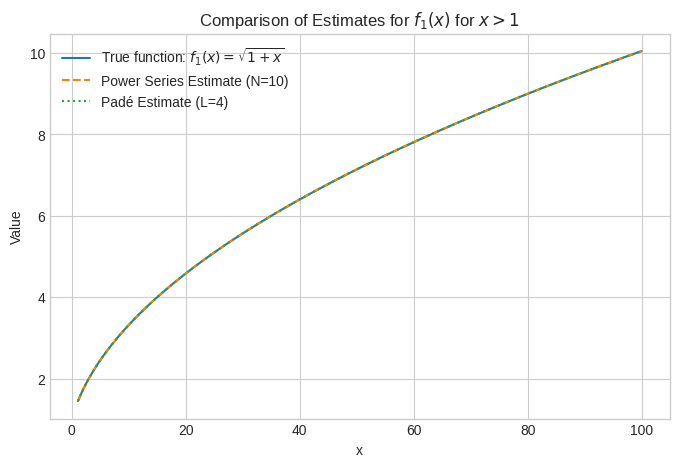

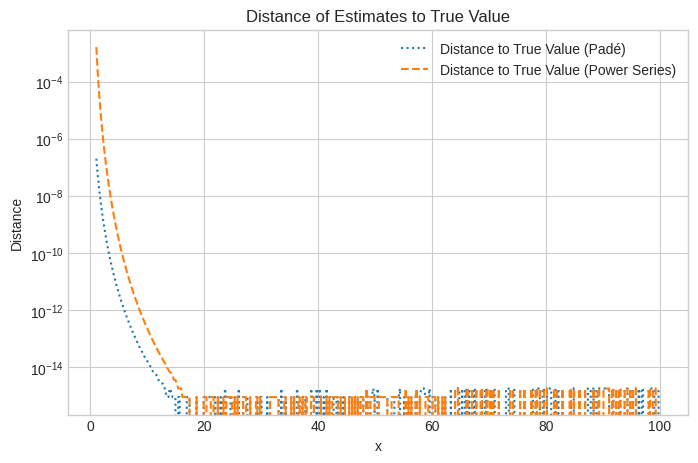

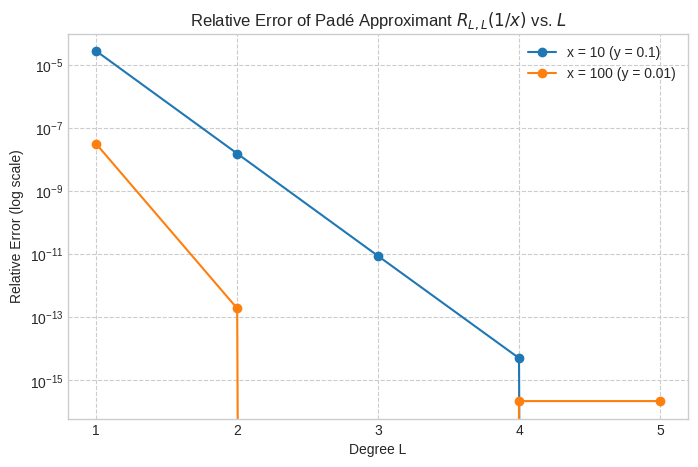

In [ ]:
import matplotlib.pyplot as plt

coeffs = get_sqrt_coefficients(30)
x_range = np.linspace(1.1, 100, 400)
y_range = 1.0 / x_range
true_f = np.sqrt(1 + x_range)

N = 10
power_series_g_vals = truncated_series(coeffs, N, y_range)
power_series_f = np.sqrt(x_range) * power_series_g_vals

L = 4
pade_g = pade_approximant(coeffs, L, L, y_range)
pade_f = np.sqrt(x_range) * pade_g

plt.figure(figsize=(8, 5))
plt.plot(x_range, true_f, label='True function: $f_1(x) = \\sqrt{1+x}$')
plt.plot(x_range, power_series_f, label=f'Power Series Estimate (N={N})', linestyle='--')
plt.plot(x_range, pade_f, label=f'Padé Estimate (L={L})', linestyle=':')

plt.title('Comparison of Estimates for $f_1(x)$ for $x > 1$')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Compare distance of pade and power series to the true value
dist_pade_to_true = np.abs(pade_f - true_f)
dist_power_series_to_true = np.abs(power_series_f - true_f)

# Plot distances
plt.figure(figsize=(8, 5))
plt.semilogy(x_range, dist_pade_to_true, label='Distance to True Value (Padé)', linestyle=':')
plt.semilogy(x_range, dist_power_series_to_true, label='Distance to True Value (Power Series)', linestyle='--')
plt.title('Distance of Estimates to True Value')
plt.xlabel('x')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()


x_vals_to_check = [10, 100]
L_range = np.arange(1, 6)

plt.figure(figsize=(8, 5))

for x_val in x_vals_to_check:
    y_val = 1.0 / x_val
    true_g_val = np.sqrt(1 + y_val)
    errors = []
    for l in L_range:
        pade_g_val = pade_approximant(coeffs, l, l, [y_val])[0]
        relative_error = abs(pade_g_val - true_g_val) / true_g_val
        errors.append(relative_error)

    plt.semilogy(L_range, errors, '-o', label=f'x = {x_val} (y = {y_val})')

plt.title('Relative Error of Padé Approximant $R_{L,L}(1/x)$ vs. $L$')
plt.xlabel('Degree L')
plt.ylabel('Relative Error (log scale)')
plt.xticks(L_range)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

The approximation for both the power series and Pade approximant gets better as $x$ grows larger. This is because $y= 1/x$ is smaller and closer to $0$. This makes them useful for creating asymptotic approximations of functions. A low-degree Padé approximant can often provide a better asymptotic formula than a high-order power series expansion.